# MNIST digits CNN using Keras / tensorflow

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


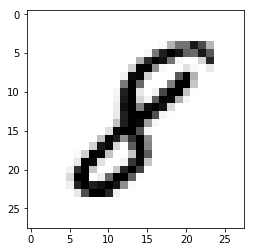

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
# convert labels to one-hot with 10 classes
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print('y_train shape:', y_train.shape)

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
y_train shape: (60000, 10)


In [5]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [6]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

W0729 10:29:56.599877 140486682163008 deprecation.py:323] From /home/ijl20/src/jupyterlab/venv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 52s 866us/sample - loss: 2.2820 - accuracy: 0.1443 - val_loss: 2.2366 - val_accuracy: 0.3168
Epoch 2/12
60000/60000 [==============================] - 50s 841us/sample - loss: 2.2050 - accuracy: 0.2665 - val_loss: 2.1381 - val_accuracy: 0.5004
Epoch 3/12
60000/60000 [==============================] - 52s 860us/sample - loss: 2.1045 - accuracy: 0.3764 - val_loss: 2.0084 - val_accuracy: 0.5847
Epoch 4/12
60000/60000 [==============================] - 52s 871us/sample - loss: 1.9734 - accuracy: 0.4583 - val_loss: 1.8429 - val_accuracy: 0.6378
Epoch 5/12
60000/60000 [==============================] - 53s 877us/sample - loss: 1.8175 - accuracy: 0.5207 - val_loss: 1.6470 - val_accuracy: 0.6830
Epoch 6/12
60000/60000 [==============================] - 58s 973us/sample - loss: 1.6400 - accuracy: 0.5681 - val_loss: 1.4377 - val_accuracy: 0.7259
Epoch 7/12
60000/60000 [====================

In [7]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 323us/sample - loss: 0.6850 - accuracy: 0.8397


In [11]:
image_index = 7777
category_name = ['ZERO','ONE','TWO','THREE','FOUR','FIVE','SIX','SEVEN','EIGHT','NINE']
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

## Predict with a chosen image

[[ 0.989  0.000  0.002  0.001  0.001  0.003  0.002  0.001  0.001  0.000]]
Index 7782 Category: ZERO Label: ZERO


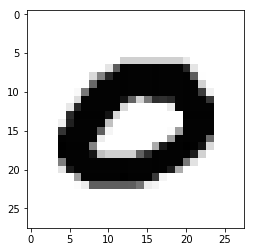

In [18]:
image_index += 1
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict([x_test[image_index].reshape(1, 28, 28, 1)])
print(pred)
predict_label = category_name[pred[0].argmax()]
correct_label = category_name[y_test[image_index].argmax()]
print('Index {0} Category: {1} Label: {2}'.format(image_index, predict_label, correct_label))

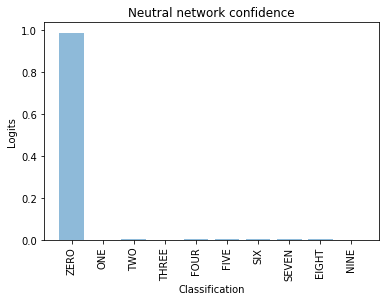

In [19]:
def print_logits(logits):
    classes = ['ZERO','ONE','TWO','THREE','FOUR','FIVE','SIX','SEVEN','EIGHT','NINE']
    index = np.arange(len(logits))
    plt.bar(index, logits, align='center', alpha=0.5)
    plt.xlabel('Classification')
    plt.ylabel('Logits')
    plt.xticks(index,classes,rotation=90)
    plt.title('Neutral network confidence')
    plt.show()

print_logits(pred[0])